# Molecular Speeds lab Python data analysis - single gas dataset processing

Start a new Code in the folder that contains the file ‘Nitrogen 28_2.csv’

I have given you an example of the full code in the workshop folder.  Remember that we can 'comment out' code by using a # so the program won't try to run it. As you read through you'll see lots of print commands commented out, these were included to check the code was working.

The first thing we want to do is define some constants that we will use later on.  These will be the Volume of the bulb, the area of the opening and the pressure at which the effusion regime begins.

You were asked to calculate some of these in the pre-workshop exercise as I reminder of the PHYS223 lab.

So let’s write the first piece of the code and set up same values to use later on (note capital V we are using here).

In [1]:
V=2.03*10**-3
A=5.55113*10**-8
ef_begin=0.26

Let’s check that worked by printing one of the variables

In [2]:
print(V)

0.0020299999999999997


To start of with we need to call up the packages that help us handle our data. packages are bunches of functions that can be imported all at the same time for later use. The package we want is called ‘numpy’ so let’s import that now.

In [3]:
import numpy as np

Now we want to import a module to help with plotting.  Some of this may be in a slightly different order to the example .py code.  
Does that matter?

In [4]:
from matplotlib import pyplot as plt

We also want to load up the data that we have in our CSVs. If you remember back to the experiment the data is pressure as a function of time. 

Now we want to use numpy to import our data, the command we are going to use is called ‘genfromtext’. We will import the data into a variable, called rawdata:

In [5]:
rawdata=np.genfromtxt("Nitrogen 28_2.csv", delimiter="cat")

Hold on...  What's this cat?

note that the delimiter argument tells Python how the data is separated, just to prove a point I’ve replaced all the commas, which are normally used to separate data, with the word ‘cat’.

This seems silly, does it really help me learn?

Hopefully.  And think back to this when you move onto the multiple data example next.

Now let’s print the variable ‘rawdata’

In [6]:
print(rawdata)

[[0.00000000e+00 3.91587981e+00]
 [1.00000000e+00 3.90860622e+00]
 [2.00000000e+00 3.89163795e+00]
 ...
 [2.28100000e+03 6.10025760e-02]
 [2.28200000e+03 6.10025760e-02]
 [2.28300000e+03 6.24196670e-02]]


This looks good and along the lines of what you expect.  It really makes sense to throw in a few tests here and there to make sure that the code is doing what you expect.

Now we want to split this array up into two vectors, one for time and one for pressure, we can do that using the indexing we learned before.

In [7]:
time=rawdata[:,0]
pressure=rawdata[:,1]

This " : " means  [ first_row:last_row , column_0 ]. 
If you have a 2-dimensional list/matrix/array, this notation will give you all the values in column 0 (from all rows).

We should probably test what's happening here, just to be sure...

In [8]:
print(time)
print(pressure)

[0.000e+00 1.000e+00 2.000e+00 ... 2.281e+03 2.282e+03 2.283e+03]
[3.91587981 3.90860622 3.89163795 ... 0.06100258 0.06100258 0.06241967]


It's quite tricky to see what's really going on here, so let's plot it out to get a better idea.

Text(0, 0.5, 'Pressure (Pa)')

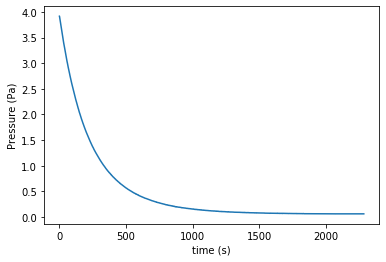

In [9]:
plt.figure(1)

plt.plot(time,pressure)
plt.xlabel("time (s)")
plt.ylabel("Pressure (Pa)")

Note that I am planning on having multiple figures so I have given this one a number.  This should help as we move along.I even remembered to label my axes and to put in units. 

If you remember back to the experiment and what we actually have to do to from the basis of our analysis here, we need to find the minimum pressure we reached. 
To do this we will use an inbuilt python function ‘min’ and set the result as a new variable ‘baseP’.

In [10]:
baseP=min(rawdata[:,1])

In [11]:
print(baseP)

0.061002576


Have a bit of a think about what that function is doing.  It is going from the first data point and last data point in our pressure column (here 1) and finding the minimum.  If you want to know more you can easily google this function and see how it operates.

We are now going to use a list comprehension to subtract the base pressure from each value in ‘Pressure’ as we will need to take the log of this later (everyone remembers the experiment and you all definitely read ahead to see where this is going...).   
We therefore want to avoid 0 values, and as baseP is in ‘Pressure’ it will return a zero, so we can just multiply it by 0.99 to avoid this.

In [12]:
P_minus_baseP=[i-0.99*baseP for i in pressure]

print(P_minus_baseP) - do this at your peril.  It gives a big list...

Now we have our pressure minus base pressure we need to find the point at which the effusion regime begins, to do this we are going to make a new vector of residuals. 

We already know the pressure at which the effusion regime begins, we called it ‘ef_begin’, what we don't know is the INDEX of this value in the pressure vector. We are going to find this using residuals. 

This vector ‘Res’ will be a vector where we take the value we are looking for ‘ef_begin’ from all values of the pressure vector the smallest value of this vector will have an index equal to that of when the effusion regime begins, in the vector ‘Pressure’.

In [13]:
res=[abs(i-ef_begin) for i in P_minus_baseP]

You should recognice the look comprehension in the line above.
We've made a new array as described above.  We now need to take the minimum value.

In [14]:
minres=min(res)

In [15]:
print(minres)

0.00043142575999999266


I get 0.00043142575999999266, you should get something similar…. Or the same.

We now need to find the index of the minimum value, for this we will use a for loop, we want the loop to run for as many entries as we have in res so we can make it run for ‘len(res)’ we then want to use an if statement, so when ‘res[i]=minres’ we assign that ‘I’ to a variable, then stop.

Just take a moment and think that through.  Can you write it yourself?

In [16]:
for i in range (len(res)):
    if res[i]==minres:
        Peff_index=i
        break

In [17]:
print(Peff_index)

691


Now we have the value of the index where the effusion regime begins we can move on.

The next step is to take the log of our data, to do this we need to import another module called ‘math’.  Maybe we could have added that to the top with numpy and matplotlib, but here we are.

In [18]:
from math import log
import math

We are going to use another list comprehension to create a new vector with all the logged values

In [19]:
LogP=[log(i) for i in P_minus_baseP]

print(LogP) - if you want to check things.  I find it better to plot.  Especially as you have your own data that you can double check against.

Text(0, 0.5, 'log Pressure (Pa)')

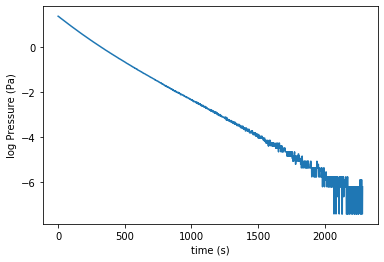

In [20]:
plt.figure(2)
plt.plot(time,LogP)
plt.xlabel("time (s)")
plt.ylabel("log Pressure (Pa)")

We can also plot only the data after we reach the effusion regime, on the same figure, the ‘r’ makes it red.

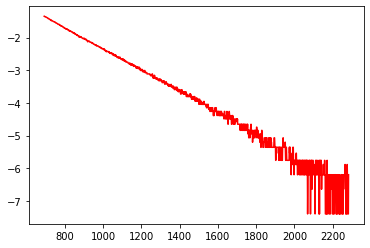

In [21]:
plt.plot(time[Peff_index:],LogP[Peff_index:],"r")

Actually, in spyder that just plots ontop..

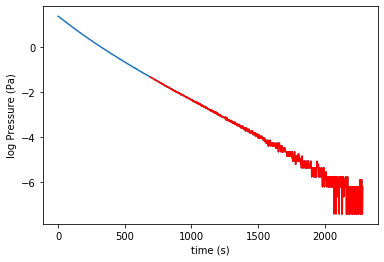

In [22]:
plt.figure(2)
plt.plot(time,LogP)
plt.xlabel("time (s)")
plt.ylabel("log Pressure (Pa)")

plt.plot(time[Peff_index:],LogP[Peff_index:],"r")


Here in the Jupyter environment I had to put them together in one code section.  So if anyone is using Jupyter you will have to do what I just did here.

Now I want to fit a trend line to the section of the data in the effusion regime. To do this I'll use a fitting tool and create a new variable. 

In [23]:
fit=np.polyfit(time[Peff_index:1400],LogP[Peff_index:1400],1)

It is worth having a bit of a think about what this polyfit is doing.  It is a numpy function.  polyfit(x,y, degree of polynomial).

What is 1400 representing?  Why is that the cut-off?  Maybe take a look at your own lab report.  But the plot here is helpful too I think.

Now is probably a good time for another print...

In [24]:
print(fit[0])
print(fit[1])

-0.0032100701686121782
0.8597164594476661


We were fitting a straight line! The fit function returns two values, one is the gradient and one is the intercept, we can make these into their own variable.

In [25]:
m=fit[0]
c=fit[1]

Now we can plot this.

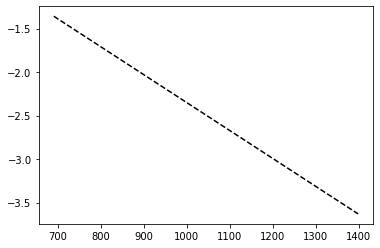

In [26]:
plt.plot(time[Peff_index:1400],time[Peff_index:1400]*m+c, "k--")

For me, I need to plot it ontop of the existing plots again. 

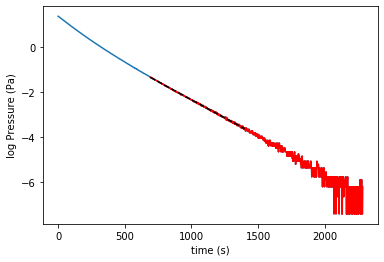

In [27]:
plt.figure(2)
plt.plot(time,LogP)
plt.xlabel("time (s)")
plt.ylabel("log Pressure (Pa)")
plt.plot(time[Peff_index:],LogP[Peff_index:],"r")
plt.plot(time[Peff_index:1400],time[Peff_index:1400]*m+c, "k--")

Hopefully you can see it all, and the small black dashes.  You can look up the plot instructions to see what k means.

We now can calculate the velocity of the nitrogen from the fit. 
Which remember, is the reason we’ve done all this work... and let's print it.

In [28]:
v=-4*V*m/A
print(v)

469.5579056720142


Do you get the same?  Does it agree with your lab report?